In [28]:
pip install yellowbrick

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 2.1 MB/s eta 0:00:000:00:0136m0:00:01
Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix

import pickle

In [3]:
with open('files/census_data.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [10]:
x_census_treinamento.shape, x_census_teste.shape, y_census_treinamento.shape, y_census_teste.shape

((27676, 108), (4885, 108), (27676,), (4885,))

In [14]:
# Fazendo treinamento com os dados feitos para isso 
naive_census = GaussianNB()
naive_census.fit(x_census_treinamento, y_census_treinamento)

previsoes = naive_census.predict(x_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [15]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [20]:
accuracy_score(y_census_teste, previsoes)

0.4767656090071648

0.4767656090071648

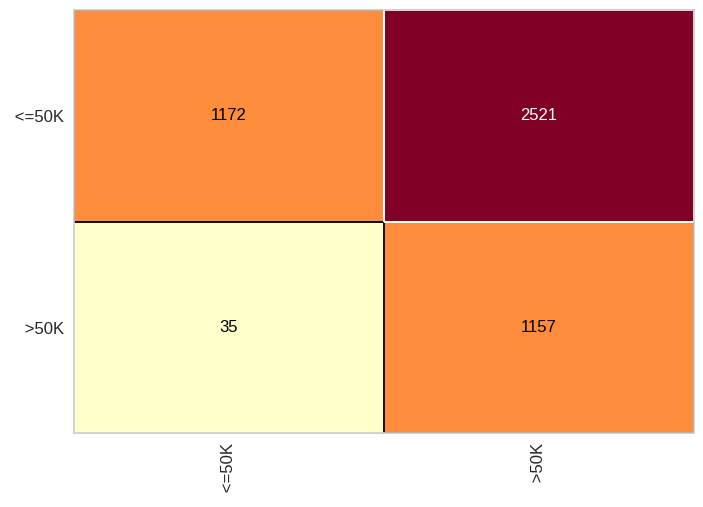

In [31]:
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [34]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

